In [1]:
%cd /content/drive/My Drive/face_detection


/content/drive/My Drive/face_detection


In [2]:
pip install cmake dlib face_recognition numpy opencv-python

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=a5aa79c1d072f485ef191c4197d75e51fefcaea15e11e803e8cb78354344c81a
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
%ls

 abc.jpg                faces/     ' test1.jpg'   test4.jpg
 face_Detction.ipynb    modi.jpg    test2.jpg     test5.jpg
 face_detection.ipynb   obama.jpg   test3.jpg


In [5]:
import face_recognition as fr 
import cv2
import os ,shutil
import numpy as np
from google.colab.patches import cv2_imshow

In [15]:
def get_encoded_faces():
  encoded = {}
  for dirpath,dname,fname in os.walk("./faces"):
    for f in fname:
      if f.endswith(".jpg") or f.endswith(".png"):
        face = fr.load_image_file("faces/"+f)
        encoding = fr.face_encodings(face)[0]
        encoded[f.split(".")[0]]= encoding
  return encoded


In [26]:
def classify_face(im):
  faces = get_encoded_faces()
  faces_encoded = list(faces.values())
  known_face_names = list(faces.keys())

  img = cv2.imread(im)
  face_location = fr.face_locations(img)
  unknown_face_encodings = fr.face_encodings(img,face_location)

  face_names = []
  for face_encoding in unknown_face_encodings:
    name = "Unknown"
    matches = fr.compare_faces(faces_encoded,face_encoding)

    face_distances = fr.face_distance(faces_encoded,face_encoding) 
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
      name = known_face_names[best_match_index]
    
    face_names.append(name)

    for (top, right, bottam, left), name in zip(face_location,face_names):
      cv2.rectangle(img,(left-20,top-20),(right+20,bottam+20),(255,0,0),2)
      cv2.rectangle(img,(left-20,bottam-10),(right+20,bottam+20),(255,0,0),cv2.FILLED)
      cv2.putText(img,name,(left-20,bottam+15),cv2.FONT_HERSHEY_DUPLEX,0.5,(255,255,255),1)
    
  while True:
    cv2_imshow(img)
    return face_names



In [40]:
def learning(image):
  c_face = classify_face(image)
  if "Unknown" in c_face:
    que = input("Threr is Unknown Face would you like to add it to the System:")
    if  que =="yes" or que == "Yes":
      imageFileName = input("Enter Name of the image")
      shutil.move(imageFileName,'/content/drive/My Drive/face_detection/faces')
      print(learning(image))
    else:
      print(c_face)
  else:
    print(c_face)


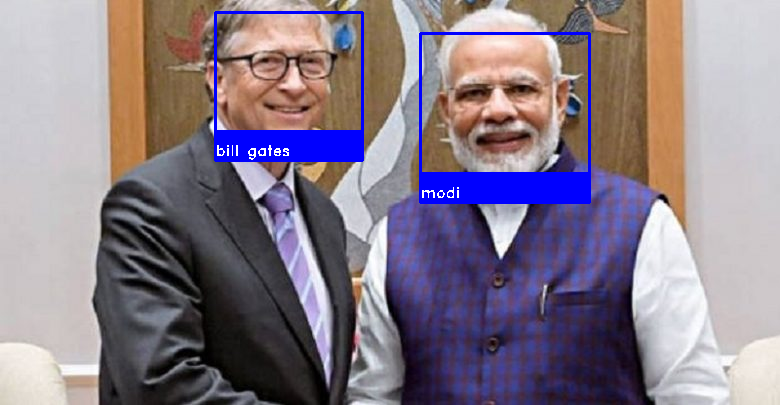

['bill gates', 'modi']


In [45]:
learning("test5.jpg")